In [338]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
%matplotlib inline

In [346]:
N = 200#Numero de puntos

# data coordinates and values
x = np.random.random(N)
y = np.random.random(N)
z = np.random.random(N)

In [347]:
# target grid to interpolate to
xi = yi = np.arange(0,1.01,0.02)
xi,yi = np.meshgrid(xi,yi)

In [348]:
# set mask
mask = (xi > 0.5) & (xi < 0.6) & (yi > 0.5) & (yi < 0.6)


In [349]:
# interpolate
zi = griddata((x,y),z, (xi,yi),method='cubic')

In [350]:
# mask out the field
zi[mask] = np.nan

In [351]:
# mask out the field
zi[mask] = np.nan

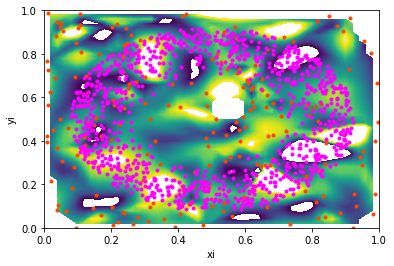

In [362]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.contourf(xi,yi,zi,np.arange(0,1.01,0.01))
plt.plot(x,y,'k.',color='orangered')
plt.xlabel('xi',fontsize=10)
plt.ylabel('yi',fontsize=10)

rad = 0.2 #Radio

#Generar anillo
theta = np.random.uniform(0.0, 2.0*np.pi, 5*N)
r =  rad+np.sqrt(np.random.uniform(0, 0.05, 5*N))
x_a =  r * np.cos(theta)+0.5
y_a = r * np.sin(theta) +0.5
plt.plot(x_a,y_a,'.',color='fuchsia')
#plt.savefig('interpolated.png',dpi=100)

In [337]:
def TansDeFou(x):
    N=len(x) #Longitud de x
    #N = x.size
    n = np.arange(N) #Nos da los numeros enteros entre [0,N) ya que la tranformada va de 0 a (N-1)
    k = n.reshape((N,1)) #Creamos un arreglo entre los valores N y 1
    expo = np.exp(-2j*np.pi*k*n/N) #Exponencial relacionada a la transformada discreta de Fouerier
    result = np.dot(expo,x)   #Transformada discreta de Fourier
    return result

C:\Users\JohnatanO\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


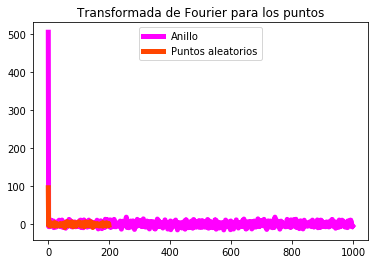

In [395]:
import scipy.fftpack
#Transfromada con nuestro alforitmo
F = TansDeFou(y_a)
FX= TansDeFou(x_a)
FF = TansDeFou(y)
FY = TansDeFou(x)
#FFF = TansDeFou(yi)
#FXX= TansDeFou(xi)
plt.plot(F,'fuchsia', linewidth = 5, label = 'Anillo')
plt.plot(FF,'orangered', linewidth = 5, label = 'Puntos aleatorios')
#plt.plot(FXX,FFF,'g', linewidth = 5, label = 'Mascara')
plt.title("Transformada de Fourier para los puntos")
plt.legend(loc="upper center") 
plt.show()

C:\Users\JohnatanO\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


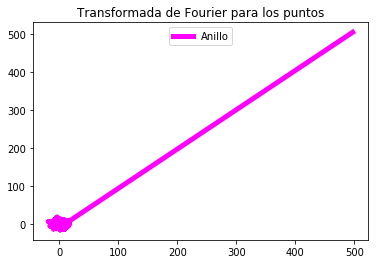

In [394]:
F = TansDeFou(y_a)
FX= TansDeFou(x_a)
plt.plot(FX,F,'fuchsia', linewidth = 5, label = 'Anillo')
plt.title("Transformada de Fourier para los puntos")
plt.legend(loc="upper center") 
plt.show()